# Basics Linear Regression

In [1]:
# import libaries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

#### numpy: is a library for scientific computing.
#### pandas: is a library for data analysis.
#### matplotlib :is a library for plotting.
#### sklearn.model_selection :is a library for splitting data into training and test sets.
#### sklearn.linear_model: is a library for linear regression.
#### sklearn.metrics :is a library for evaluating machine learning models.

# Load data

In [8]:
data = pd.read_csv("Salary_Data.csv")


# EDA

### Print first few rows from the dataset.

In [9]:
data.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.1,39343.0
1,1,1.3,46205.0
2,2,1.5,37731.0
3,3,2.0,43525.0
4,4,2.2,39891.0


### Drop the column(Unnamed: 0) from the dataset

In [10]:
data = data.drop("Unnamed: 0", axis=1)

### Print first few rows from the dataset after dropping the column(Unnamed: 0)

In [11]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


### Print summary of the statistical distribution of the numeric columns in a dataset like count, mean, std, min, max,....etc.

In [12]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


### Print a summary of the dataset, including the number of rows, the number of columns, the data type of each column, and the number of non-null values in each column.

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


### Create a scatter plot of the YearsExperience and Salary columns in the dataset. The 'rx' argument specifies that the points should be plotted as red crosses.

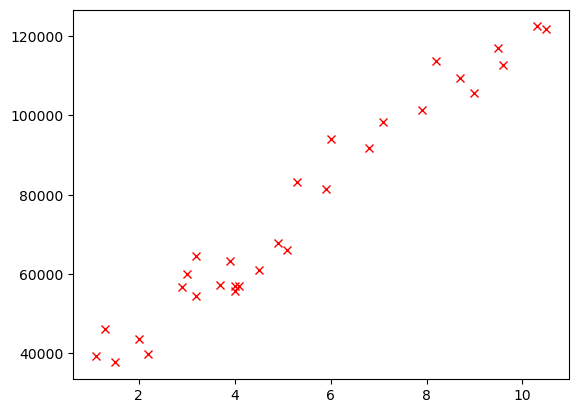

In [15]:
plt.plot(data.YearsExperience, data.Salary,'rx')

# Problem framing 

### Set the YearsExperience column as the independent variable and the Salary column as the dependent variable

In [18]:
# set depandent and independant variable
X = data["YearsExperience"]
y = data["Salary"]

# Prepare data for ML model 

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=47)

### The train_test_split() function is a built-in function in the scikit-learn library. It takes four arguments: (X) The independent variables. (y) The dependent variables. (test_size): The proportion of the data that should be used for the test set. (random_state): A random number seed.
### The train_test_split() function will randomly split the data into two sets: the training set and the test set. The training set will be used to train the machine learning model. The test set will be used to evaluate the performance of the machine learning model.
### In this case, the test_size argument is set to 0.3, which means that 30% of the data will be used for the test set and 70% of the data will be used for the training set. The random_state argument is set to 47, which ensures that the same random split of the data is used each time the code is run.

# Training linear regression model

### create a linear regression model.

In [20]:
linear_regressor = LinearRegression()

### Reshaping the arrays in this way ensures that the machine learning algorithm will be able to correctly process the data.This is necessary because the LinearRegression() class expects the independent variables and dependent variables to be 2D arrays.

In [21]:
X_train = X_train.values.reshape((-1, 1))
y_train = y_train.values.reshape((-1, 1))

### will fit the linear regression model to the training data. Once the model is fitted, it can be used to predict the values of the dependent variable for new data.

In [22]:
linear_regressor.fit(X_train, y_train)

LinearRegression()

# Interprete the model

In [24]:
print("The intercept is:\n", linear_regressor.intercept_)

print("\nThe coefficient is:\n",linear_regressor.coef_)

The intercept is:
 [25789.06076797]

The coefficient is:
 [[9479.09167874]]


### The intercept, 25789.06076797, is the value of the dependent variable when all of the independent variables are equal to 0. In this case, the dependent variable is salary, so the intercept is the value of salary when experience is 0.
### The coefficient of the independent variable, 9479.09167874, is the weight that is applied to the independent variable to calculate the dependent variable. In this case, the independent variable is experience, so the coefficient of experience is the amount that salary increases for every additional year of experience.

# Make prediciton 

### reshapes the array X_test into a 2-dimensional array with a single column. This is necessary because the linear_regressor.predict() method expects the input data to be in this format.

In [25]:
X_test = X_test.values.reshape((-1, 1))

### make predictions on the test data. The linear_regressor.predict() method takes the array X_test as input and returns an array of predictions.

In [26]:
y_pred = linear_regressor.predict(X_test)

### plots the actual values of the target variable against the test data.Then,plots the predictions made by the linear regression model against the test data. 

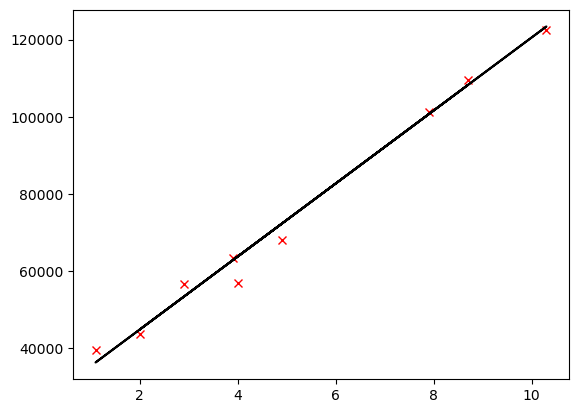

In [27]:
plt.plot(X_test, y_test,'rx')
plt.plot(X_test, y_pred, color='black')
plt.show()

# Evaluate the model 

In [28]:
metrics.mean_absolute_error(y_test, y_pred)

2450.548521354496

####  calculates the mean absolute error (MAE) between the actual values of the target variable (y_test) and the predictions made by the linear regression model (y_pred).

#### The MAE is a measure of the average difference between the actual values and the predictions. A lower MAE indicates that the model is performing better.

In [29]:
metrics.mean_squared_error(y_test, y_pred)

9961725.246016478

#### calculates the mean squared error (MSE) between the actual values of the target variable (y_test) and the predictions made by the linear regression model (y_pred).

#### The MSE is a measure of the average squared difference between the actual values and the predictions. A lower MSE indicates that the model is performing better.

In [30]:
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

3156.220088336122

#### calculates the root mean squared error (RMSE) between the actual values of the target variable (y_test) and the predictions made by the linear regression model (y_pred).

#### The RMSE is a measure of the average squared root difference between the actual values and the predictions. A lower RMSE indicates that the model is performing better.